# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

## Parte 1

### _Setup_ da parte 1

In [6]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})
df = dataframe.copy()

## Inicie sua análise a partir da parte 1 a partir daqui

In [11]:
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [123]:
df_info = pd.DataFrame({'mean': [df.normal.mean(),df.binomial.mean()], 
              'std': [df.normal.std(),df.binomial.std()],
              'var': [df.normal.var(),df.binomial.var()],
              'var': [round(df.normal.var(),2), round(df.binomial.var(),2)], 
              'max': [max(df.normal), max(df.binomial)], 
              'min': [min(df.normal),min(df.binomial)]},
                index = ['normal','binominal' ])
                
df_info

,mean,std,var,max,min
normal,19.991456,4.013850,16.11,35.704951,4.310399
binominal,20.097000,4.041191,16.33,36.000000,6.000000


## Normal distribution

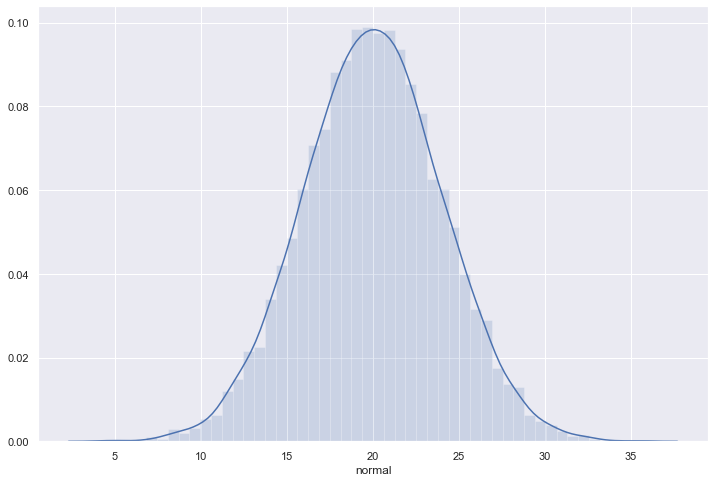

In [44]:
# Sua análise da parte 1 começa aqui.abs
sns.distplot(df['normal'], label="Normal",  hist_kws={"alpha": 0.2})
plt.show()

## Binomial distribution

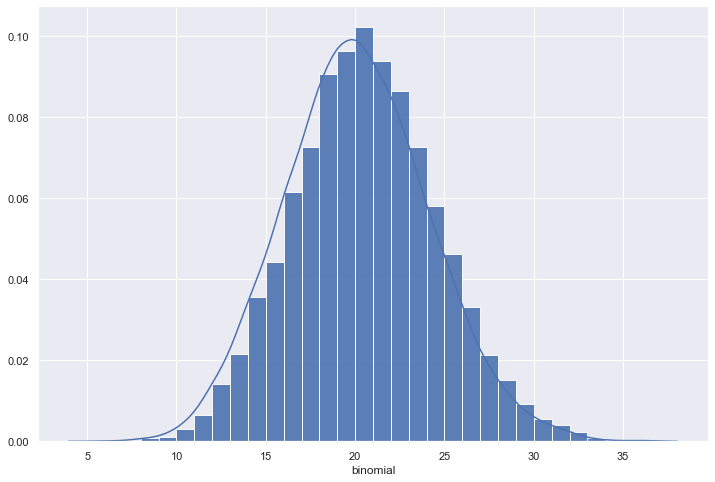

In [102]:
sns.distplot(df['binomial'], bins=range(6,36), kde=True, label = "Binominal",  hist_kws={"alpha": 0.9})
plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [98]:
#Using the theorical distribution
q1_norm, q2_norm, q3_norm = [sct.norm.ppf(x, loc = 20, scale = 4) for x in [0.25, 0.5, 0.75]]
q1_binom, q2_binom, q3_binom = [sct.binom.ppf(x, 100, 0.2) for x in [0.25, 0.5, 0.75]]
diff =(q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom) 

print("Q% normal", q1_norm, q2_norm, q3_norm)
print("Q% binomial", q1_binom, q2_binom, q3_binom)
print('Difference', diff)

Q% normal 17.302040999215674 20.0 22.697959000784326
Q% binomial 17.0 20.0 23.0
Difference (0.3020409992156736, 0.0, -0.3020409992156736)


In [183]:
#Using the dataframe
quantiles = [df.quantile(q = x) for x in [0.25, 0.5, 0.75]] #get quantiles of the dataframe
diff= tuple(([round(quantiles[i][0]- quantiles[i][1],3) for i in range(3)])) #subtract to get the difference

print("Q% normal", [quantiles[i][0] for i in range(3)])
print("Q% binomial", [quantiles[i][1] for i in range(3)])
print('Difference', diff)

Q% normal [17.30963787997159, 19.98962009682849, 22.68432355145866]
Q% binomial [17.0, 20.0, 23.0]
Difference (0.31, -0.01, -0.316)


In [7]:
def q1():
    quantiles = [df.quantile(q = x) for x in [0.25, 0.5, 0.75]] #get quantiles of the dataframe
    aux = ([round(quantiles[i][0].item()- quantiles[i][1].item(),3) for i in range(3)]) #subtract to get the difference
    return tuple(aux)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

In [110]:
mu_norm = sum(df.normal)/len(df)
var_norm = sum(df.normal**2)/len(df) - (sum(df.normal)/len(df))**2

19.991456066526293

Estas distribuições apesar de distintas, possuem o valor esperado e variância muito parecidos.
Sabendo que a distribuição binomial pode ser aproximada pela função normal. Então teremos algo da forma:

$X \sim  N(np ,np(1-p))$ 

Sendo a distribuição binomial definida \
$X \sim  Bin(n,p)$ \
$E(X) = np = 100.0,2 = 20 $\
$Var(X) = np(1-p) = 100.  0,2 .(1 - 0,2) = 16$

Sendo a distribuição normal definida \
$X \sim  N(\mu,\sigma^2)$ \
$E(X) = \mu \approx 19.99 $ \
$Var(X) = E(X^2)-E(X)^2 \approx 16.1$ 

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [47]:
def q2():
    interval_left = df.normal.mean()-df.normal.std()
    interval_right = df.normal.mean()+ df.normal.std()

    prob_left = sct.norm.cdf(interval_left, loc=20, scale=4) 
    prob_ = sct.norm.cdf(interval_right, loc=20, scale=4) 
    prob = prob_ - prob_left
    return prob.item()

In [37]:
q2()

0.684361076857501

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

Sim! 
* A probabilidade de $X$ assumir valores entre $\mu - \sigma$ e $\mu + \sigma$ é de 68.27%.
* A probabilidade de $X$ assumir valores entre $\mu - 2\sigma$ e $\mu + 2\sigma$ é de 95.45%.
* A probabilidade de $X$ assumir valores entre $\mu - 3\sigma$ e $\mu + 3\sigma$ é de 99.73%.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [45]:
def q3():
    m_binom = df.binomial.mean().item()
    v_binom = df.binomial.var().item()
    m_norm = df.normal.mean().item()
    v_norm = df.normal.var().item()
    return (round(m_binom - m_norm,3), round(v_binom - v_norm,3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### Data Set Information:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South) [1].

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter (see [2] for more uses).

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation (see [2] for an introduction to pulsar astrophysics to find out why). Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,
(see [4,5,6,7,8,9]) which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. At present multi-class labels are unavailable, given the costs associated with data annotation.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool). Candidates are stored in both files in separate rows. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Please note that the data contains no positional information or other astronomical details. It is simply feature data extracted from candidate files using the PulsarFeatureLab tool (see [10]).

### Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency (see [3] for more details). The remaining four variables are similarly obtained from the DM-SNR curve (again see [3] for more details). These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary
17,898 total examples.
1,639 positive examples.
16,259 negative examples.

### _Setup_ da parte 2

In [3]:
stars = pd.read_csv("data/pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Inicie sua análise da parte 2 a partir daqui

In [169]:
stars[stars['target']==True]

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
18,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,True
41,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,True
60,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,True
91,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,True
92,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,True
...,...,...,...,...,...,...,...,...,...
17514,89.867188,47.482295,1.591325,2.505057,0.763378,12.393561,17.940745,333.902631,True
17528,27.039062,33.754722,4.779124,26.255357,129.863712,78.815440,-0.348492,-0.893791,True
17557,77.070312,39.000638,1.884421,6.372178,38.517559,65.741059,1.589513,1.285346,True
17641,28.375000,27.649311,6.377273,45.944048,141.860368,82.893017,-0.477222,-1.067880,True


In [168]:
stars[stars['target']==True].describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

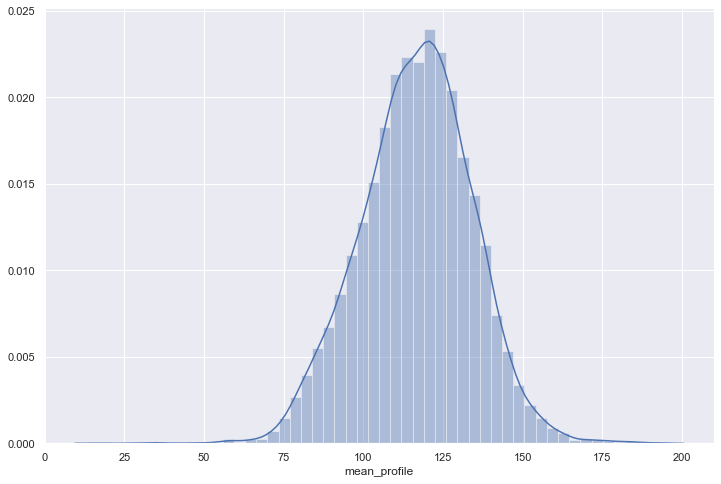

In [208]:
false_pulsar_mean_profile = stars.loc[stars['target']==False, 'mean_profile']
sns.distplot(false_pulsar_mean_profile)
plt.show()

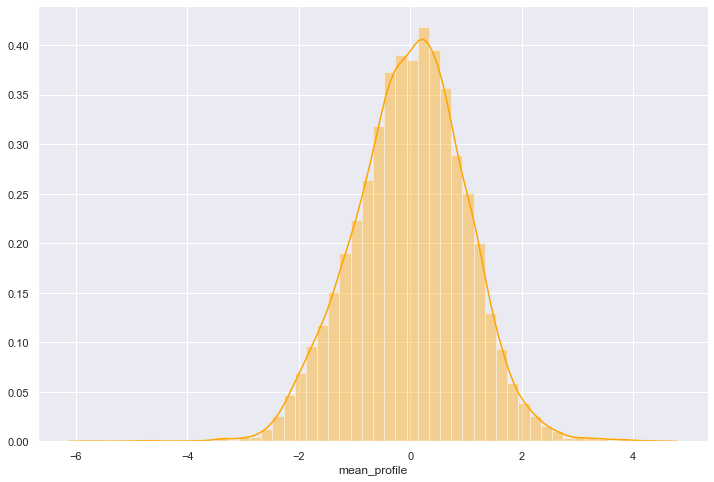

In [213]:
false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
sns.distplot(false_pulsar_mean_profile_standardized, color = 'orange', label= 'Standardized Non Pulsar stars')
#sns.distplot(sct.norm.rvs(0, 1, size=10000), color ='blue' , label='Theoric normal')
plt.show()

In [215]:
q1_norm, q2_norm, q3_norm = [sct.norm.ppf(x, loc = 0, scale = 1) for x in [0.80, 0.90, 0.95]]
q1_norm, q2_norm, q3_norm # valores X para os determinados valores da PDF  [0.80, 0.90, 0.95]

(0.8416212335729143, 1.2815515655446004, 1.6448536269514722)

In [16]:
def q4():
    false_pulsar_mean_profile = stars.loc[stars['target']==False, 'mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    q1_norm, q2_norm, q3_norm = [sct.norm.ppf(x, loc = 0, scale = 1) for x in [0.80, 0.90, 0.95]]
    q1 = round((false_pulsar_mean_profile_standardized<=q1_norm).sum()/len(false_pulsar_mean_profile_standardized),3).item()
    q2 = round((false_pulsar_mean_profile_standardized<=q2_norm).sum()/len(false_pulsar_mean_profile_standardized),3).item()
    q3 = round((false_pulsar_mean_profile_standardized<=q3_norm).sum()/len(false_pulsar_mean_profile_standardized),3).item()
    return (q1, q2, q3) 

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Sim! Os valores fazem muito sentido, a distribuição da variável segue a dist. Normal, o valor dos quartis encontrados para os mesmos valores definidos em uma curva teórica são muito próximos!
Obtivemos valores de quartis muitos próximos aos quartis que definimos na da dist. normal teórica [0.80, 0.90, 0.95]

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [4]:
def q5():
    false_pulsar_mean_profile = stars.loc[stars['target']==False, 'mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    q1_norm, q2_norm, q3_norm = [sct.norm.ppf(x, loc = 0, scale = 1).item() for x in [0.25, 0.5, 0.75]]
    q1_pulsar, q2_pulsar, q3_pulsar = [false_pulsar_mean_profile_standardized.quantile(q = x).item() for x in [0.25, 0.50, 0.75]] #get quantiles of the dataframe 
    diff1 = round(q1_pulsar - q1_norm,3)
    diff2 = round(q2_pulsar - q2_norm,3)
    diff3 = round(q3_pulsar - q3_norm,3)
    return (diff1,diff2,diff3)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

In [5]:
(q5())

(0.027, 0.04, -0.004)

Sim! Na curva teórica encontramos (0.842, 1.281, 1.645), enquanto para a variável x encontramos(0.825, 1.231, 1.56).